#Mathematical and Bayesian Models

### Demo 2 : K Nearest Neighbor Classifier

In this demo, you will learn how to apply KNN algorithm in Python using scikit-learn library.

---

## Problem Statement

Given the details of cars, we have to classify the origin of the cars.

---

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from io import StringIO

from matplotlib.colors import ListedColormap
#%matplotlib inline

---

## Dataset

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." 
Attribute Information:

- __mpg__: continuous
- __cylinders__: multi-valued discrete
- __displacement__: continuous
- __horsepower__: continuous
- __weight__: continuous
- __acceleration__: continuous
- __model year__: multi-valued discrete
- __origin__: multi-valued discrete
- __car name__: string (unique for each instance)

---

## Data Analysis

In [2]:
auto_data=pd.read_csv('C:/Users/ASUS/Desktop/Intellipaat/Datasets/auto-mpg.csv')

<div style="background-color:##EDF9FF">
  <ul><li><h3> Checking Data</h3></li></ul>
</div>

In [3]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto_data.shape

(398, 9)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Number of rows and columns </span>
</div>

In [5]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
auto_data.describe(include='O')

,car name
count,398
unique,305
top,ford pinto
freq,6


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We can see how many unique values and frquecy of majority values in each categoical column are present.</span>
</div>

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We can check standard deviation, mean and other values of all continous columns present in the dataset.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking DataType</h3></li></ul>
</div>

In [7]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We will have to encode the categorical features later</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [8]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has 6 null values in horsepower column</span>
</div>

In [9]:
auto_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no NA values</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Treating Null Values</h3></li></ul>
</div>

In [10]:
auto_data.horsepower.mean()

104.46938775510205

In [11]:
auto_data.horsepower=auto_data.horsepower.fillna(auto_data.horsepower.mean())

In [12]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">No null values in the dataset now.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Predictor And Data</h3></li></ul>
</div>

In [13]:
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
print(*auto_data.columns,sep=' | ')

mpg | cylinders | displacement | horsepower | weight | acceleration | model year | origin | car name


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dropping car name as it is not useful in predicting the origin.</span>
</div>

In [15]:
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [16]:
feat=auto_data.columns
feat=feat.drop(['car name', 'origin'])

In [17]:
X=auto_data[feat]
y=auto_data.origin

In [18]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [19]:
print(X.shape,y.shape)

(398, 7) (398,)


<div style="background-color:##EDF9FF">
  <ul><li><h3> Scaling The Data</h3></li></ul>
</div>

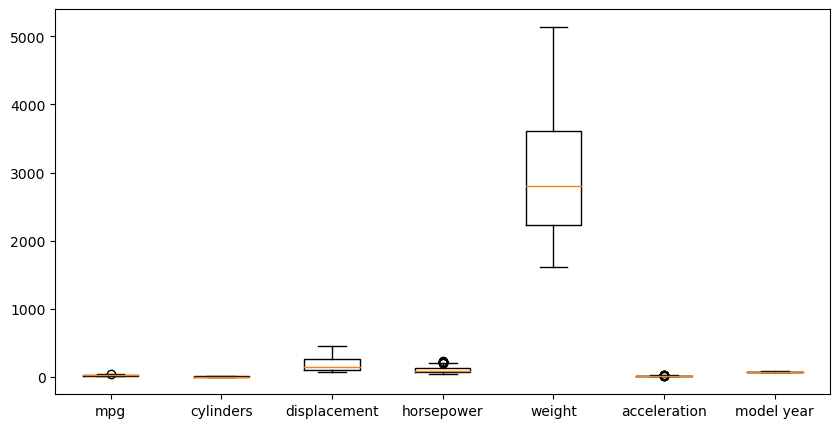

In [20]:
plt.figure(figsize=(10,5))
plt.boxplot(X,labels=feat)
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">The data is highly imbalanced. Using MinMaxScaler to scale the data.</span>
</div>

In [21]:
scl=MinMaxScaler()

In [22]:
X=scl.fit_transform(X)

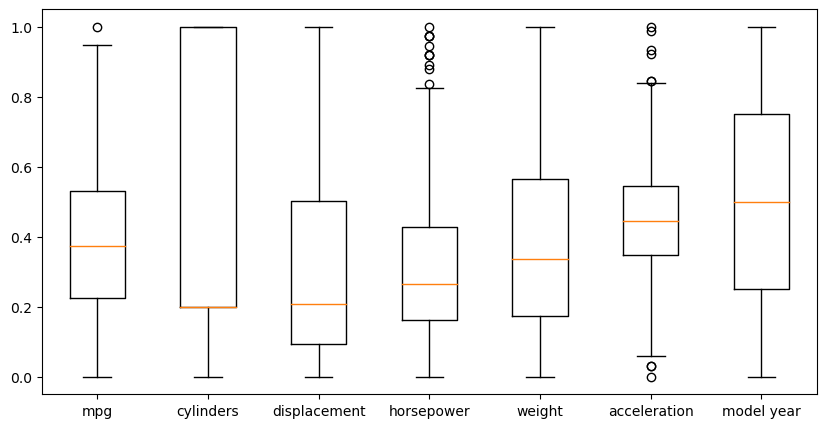

In [23]:
plt.figure(figsize=(10,5))
plt.boxplot(X,labels=feat)
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [24]:
Target_ratio=y.value_counts()/len(y)
print(Target_ratio)

1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64


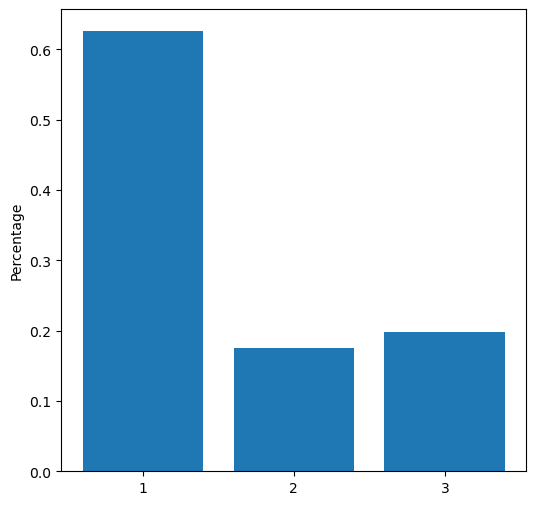

In [25]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.xticks(Target_ratio.index)
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has around 62% of entries for origin 1</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Train Test Split</h3></li></ul>
</div>

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0, test_size=0.3)

---

## K - Nearest Neighbor

Key hyperparameters to be considered before applying the KNN algorithm:

- __n_neighbors__: Integer value to determine the number of neighbors to use by default it is __5__.


For more information about other hyperparameters see <a href='https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>KNN</a> section in the documentation here.

In [27]:
knn6=KNeighborsClassifier(n_neighbors=6)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
knn6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

## Accuracy Score

<div style="background-color:##EDF9FF">
  <ul><li><h3> KNN With 6 Neighbors</h3></li></ul>
</div>

In [28]:
pred=knn6.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.75


In [29]:
pred

array([1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 1,
       2, 3, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2,
       3, 2, 1, 3, 3, 1, 1, 1, 1, 3], dtype=int64)

<div style="background-color:##EDF9FF">
  <ul><li><h3> KNN With 3 Neighbors</h3></li></ul>
</div>

In [30]:
pred=knn3.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.7


In [31]:
X_test

array([[0.13297872, 1.        , 0.73126615, 0.58152174, 0.71335413,
        0.29761905, 0.16666667],
       [0.42553191, 0.2       , 0.18604651, 0.1576087 , 0.26339665,
        0.53571429, 0.33333333],
       [0.10638298, 1.        , 0.60465116, 0.51086957, 0.76013609,
        0.47619048, 0.16666667],
       [0.31914894, 0.2       , 0.13436693, 0.22282609, 0.38729799,
        0.68452381, 0.16666667],
       [0.2393617 , 0.6       , 0.42377261, 0.29347826, 0.47490785,
        0.44642857, 0.08333333],
       [0.69148936, 0.2       , 0.01033592, 0.125     , 0.        ,
        0.5952381 , 0.08333333],
       [0.66755319, 0.2       , 0.04651163, 0.10326087, 0.1026368 ,
        0.42857143, 0.75      ],
       [0.29255319, 0.2       , 0.18604651, 0.23913043, 0.22540403,
        0.68452381, 0.16666667],
       [0.15957447, 1.        , 0.85788114, 0.56521739, 0.60901616,
        0.08928571, 0.        ],
       [0.3856383 , 0.6       , 0.27131783, 0.34782609, 0.31528211,
        0.27380952, 0.9

In [32]:
pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 3, 1, 2, 1, 3, 2, 1, 3, 1, 1, 1, 2, 3, 3, 3, 3, 1, 1,
       2, 3, 2, 1, 1, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       3, 2, 1, 3, 3, 1, 1, 1, 1, 3], dtype=int64)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Slightly better accuracy with 3 neighbors</span>
</div>

## Multiclass ROC Curve

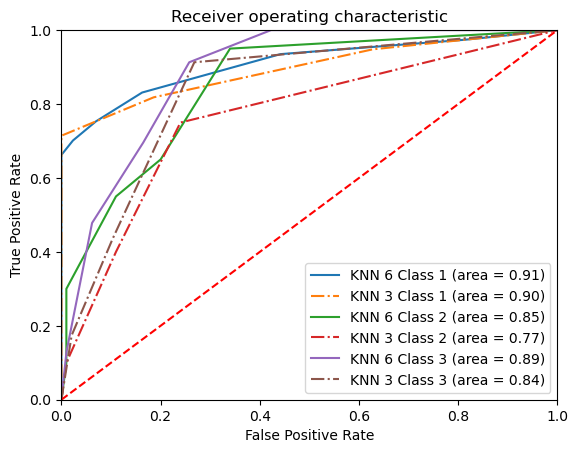

In [33]:
knn6_prob=knn6.predict_proba(X_test).T
knn3_prob=knn3.predict_proba(X_test).T

dummy_y_test=pd.get_dummies(y_test)

knn6_roc_auc=dict()
knn3_roc_auc=dict()
lfpr6=dict()
ltpr6=dict()
lfpr3=dict()
ltpr3=dict()
lthresholds6=dict()
lthresholds3=dict()
for i in dummy_y_test.columns:
    knn6_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn6_prob[i-1])
    knn3_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn3_prob[i-1])
    lfpr6[i], ltpr6[i], lthresholds6[i] = roc_curve(dummy_y_test[i], knn6_prob[i-1])
    lfpr3[i], ltpr3[i], lthresholds3[i] = roc_curve(dummy_y_test[i], knn3_prob[i-1])


for i in dummy_y_test.columns:
    plt.plot(lfpr6[i], ltpr6[i], label='KNN 6 Class '+str(i)+ ' (area = %0.2f)' % knn6_roc_auc[i])
    plt.plot(lfpr3[i], ltpr3[i],'-.', label='KNN 3 Class '+str(i)+ ' (area = %0.2f)' % knn3_roc_auc[i])



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">KNN 6 Class 1 has highest AUC value</span>
</div>

<b><i>Conclusion</i></b>: In this demonstration, we have gained an understanding of how to apply KNN algorithm.

In [34]:
## ## Check for real data and generate the report

In [35]:
dr = pd.read_csv("C:/Users/ASUS/Desktop/Intellipaat/Datasets/auto-mpg_real.csv")
dr1 = pd.read_csv("C:/Users/ASUS/Desktop/Intellipaat/Datasets/auto-mpg_real.csv")
dr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [36]:
dr.horsepower=dr.horsepower.fillna(dr.horsepower.mean())

In [37]:
scl=MinMaxScaler()
dr=scl.fit_transform(dr)

In [38]:
predr=knn6.predict(dr)

In [39]:
predr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2,
       3, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 2, 1,
       2, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1,

In [40]:
dr

array([[0.2393617 , 1.        , 0.61757106, ..., 0.5361497 , 0.23809524,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.58973632, 0.20833333,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.51686986, 0.17857143,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.19336547, 0.21428571,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.2869294 , 0.63095238,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.31386447, 0.67857143,
        1.        ]])

In [41]:
dr1["Predicted_origin"] = predr
dr1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Predicted_origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,3
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [42]:
dr1.to_csv("PRED_REPORT.csv", index = False)